In [126]:
try:
    initialized
except NameError:
    ## Matplotlib configuration
    %matplotlib inline
    initialized = True

from sklearn.linear_model import LinearRegression, RidgeCV
from lib import Model, Humanizer, Plotter
from lib.hbsort import DataFrameBuilder, ExperimentInfo
from mynotebook import *

In [139]:
# load all profiling and target with workers, input size and time
exp_info = ExperimentInfo(threads=2, block_size=128 * 1024**2)
df_builder = DataFrameBuilder(threads=exp_info.threads, stage=0)
prof_out = df_builder.get_profiling()
target1_out = df_builder.get_target(1)
target2_out = df_builder.get_target(2)

humanizer = Humanizer(size=Humanizer.SIZE_MIB)
prof = process_outliers(prof_out, humanizer)
humanizer = Humanizer(size=Humanizer.SIZE_GIB)
target1 = process_outliers(target1_out, humanizer)
target2 = process_outliers(target2_out, humanizer)

,input size (MiB),workers,outliers,samples,available
0,263,1,3,10,7
1,263,2,2,10,8
2,526,1,1,10,9
3,526,2,0,10,10
4,526,4,0,10,10
5,1051,1,1,10,9
6,1051,2,2,10,8
7,1051,4,1,10,9
8,1051,8,0,10,10
9,2102,2,2,10,8


,input size (GiB),workers,outliers,samples,available
0,3,1,2,10,8
1,3,2,0,10,10
2,3,4,1,10,9
3,3,8,1,10,9
4,3,12,2,10,8
5,3,16,0,10,10


,input size (GiB),workers,outliers,samples,available
0,31,16,0,10,10
1,31,32,1,10,9
2,31,64,2,10,8
3,31,123,2,10,8
4,31,128,0,10,10


,input,workers,iter_stg0_f,iter_stg0_nf,ms
135,6.89e+07,4,1,2,8611
146,1.38e+08,4,1,4,9375
94,6.89e+07,2,1,0,11322


,input,workers,iter_stg0_f,iter_stg0_nf,ms
11,8.21e+08,2,1,12,30359
54,1.03e+08,16,1,12,10580
20,4.11e+08,4,1,12,18345


[0.10593401232357148,
 ((1.0, 137782909.5), 0.20339584282058593),
 ((1.0, 275563966.0), 0.06293576417259793),
 ((1.0, 551121145.0), 0.08073737268012464),
 ((2.0, 68891454.75), 0.22789056694871895),
 ((2.0, 137781983.0), 0.23452832712486438),
 ((2.0, 275560572.5), 0.0630016152888302),
 ((2.0, 551125008.5), 0.04493070081080126),
 ((4.0, 68890991.5), 0.02944700731591778),
 ((4.0, 137780286.25), 0.23791404865875204),
 ((4.0, 275562504.25), 0.03517138972072281),
 ((8.0, 68890143.125), 0.03476700929014302),
 ((8.0, 137781252.125), 0.05570973626950617)]

7401.0293066038375

array([  2.18300175e-05,  -1.33670416e+02,   0.00000000e+00,
         2.39759946e+02])

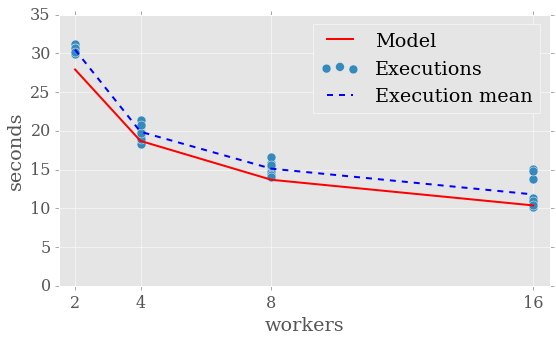

[0.08616605149854135,
 ((2.0, 821245975.0), 0.08353396619540839),
 ((4.0, 410622987.5), 0.06192418826191473),
 ((8.0, 205311493.75), 0.09222734972814857),
 ((16.0, 102655746.875), 0.10516064530799181)]

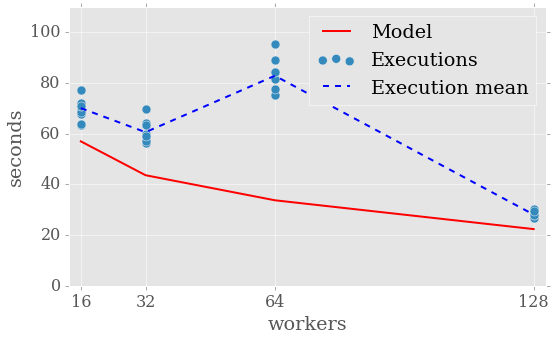

[0.2993305982853297,
 ((16.0, 1026550121.71875), 0.1837315826195935),
 ((32.0, 513275060.859375), 0.2768978528922623),
 ((64.0, 256637530.4296875), 0.5903983473240116),
 ((128.0, 128318765.21484375), 0.20226488557388106)]

In [140]:
# Make regressions on total application time
_prof = prof.copy()
_target1 = target1[(target1.workers != 12) & (target1.workers != 1)].copy()
_target2 = target2[target2.workers != 123].copy()

_prof.input /= _prof.workers * 2
_target1.input /= _target1.workers * 2
_target2.input /= _target2.workers * 2

use_log = False
if use_log:
    for task_type in ['f', 'nf']:
        key = 'iter_stg0_{}'.format(task_type)
        for df in [_prof, _target1, _target2]:
            df.replace({key: {0: 1}}, inplace=True)

display(_prof.sample(3))
display(_target1.sample(3))
model = Model(RidgeCV(normalize=True, fit_intercept=True), use_log=use_log)
model.fit(_prof)
display(model.score(_prof))
linear = model.get_linreg()
display(linear.intercept_, linear.coef_)

plotter = Plotter((1.5, 16.5))
plotter.plot_model(model, _target1)
display(model.score(_target1))

plotter = Plotter((13, 131))
plotter.plot_model(model, _target2)
display(model.score(_target2))

model0 = model

In [129]:
# load all profiling and target with workers, input size and time
exp_info = ExperimentInfo(threads=2, block_size=128 * 1024**2)
df_builder = DataFrameBuilder(threads=exp_info.threads, stage=1)
prof_out = df_builder.get_profiling()
target1_out = df_builder.get_target(1)
target2_out = df_builder.get_target(2)

humanizer = Humanizer(size=Humanizer.SIZE_MIB)
prof = process_outliers(prof_out, humanizer)
humanizer = Humanizer(size=Humanizer.SIZE_GIB)
target1 = process_outliers(target1_out, humanizer)
target2 = process_outliers(target2_out, humanizer)

,input size (MiB),workers,outliers,samples,available
0,263,1,2,10,8
1,263,2,2,10,8
2,526,1,2,10,8
3,526,2,0,10,10
4,526,4,1,10,9
5,1051,1,2,10,8
6,1051,2,3,10,7
7,1051,4,0,10,10
8,1051,8,0,10,10
9,2102,2,0,10,10


,input size (GiB),workers,outliers,samples,available
0,3,1,0,10,10
1,3,2,1,10,9
2,3,4,1,10,9
3,3,8,1,10,9
4,3,12,0,10,10
5,3,16,0,10,10


,input size (GiB),workers,outliers,samples,available
0,31,16,1,10,9
1,31,32,0,10,10
2,31,64,1,10,9
3,31,123,1,10,9
4,31,128,0,10,10


,input,workers,iter_stg1_f,iter_stg1_nf,ms
71,2.76e+08,1,1,0,30045
84,5.51e+08,1,1,0,54707
160,6.89e+07,8,1,3,14686


,input,workers,iter_stg1_f,iter_stg1_nf,ms
15,8.21e+08,2,1,0,96682
52,1.03e+08,16,1,7,28790
33,2.05e+08,8,1,3,40427


[0.275754263991025,
 ((1.0, 137782909.5), 0.0538954269720762),
 ((1.0, 275563966.0), 0.038691722148593434),
 ((1.0, 551121145.0), 0.017764208117687225),
 ((2.0, 68891454.75), 1.1965854563066185),
 ((2.0, 137781983.0), 0.25028245192542586),
 ((2.0, 275560572.5), 0.09815814404468294),
 ((2.0, 551125008.5), 0.034727780593962886),
 ((4.0, 68890991.5), 0.534432706275413),
 ((4.0, 137780286.25), 0.41380725892604486),
 ((4.0, 275562504.25), 0.037356008979629006),
 ((8.0, 68890143.125), 0.5339031074258659),
 ((8.0, 137781252.125), 0.06514020493473266)]

-9411.3929775443394

array([  1.02191454e-04,   9.16134662e+03,   0.00000000e+00,
        -1.73393261e+04])

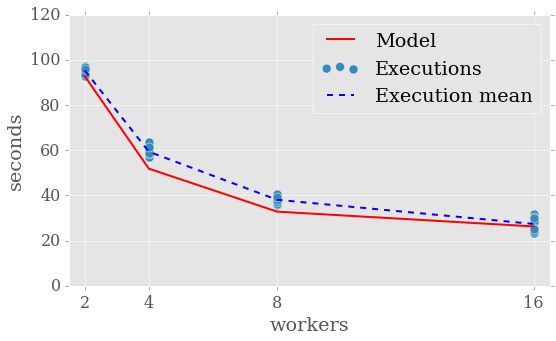

[0.09397039725066986,
 ((2.0, 821245975.0), 0.02645031347221439),
 ((4.0, 410622987.5), 0.12564081130773025),
 ((8.0, 205311493.75), 0.1360639844526148),
 ((16.0, 102655746.875), 0.08835087151817488)]

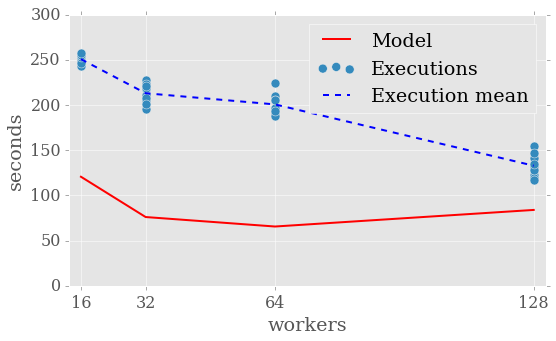

[0.5467653094017646,
 ((16.0, 1026550121.71875), 0.5186794445109261),
 ((32.0, 513275060.859375), 0.6421351015442645),
 ((64.0, 256637530.4296875), 0.6721808986085384),
 ((128.0, 128318765.21484375), 0.36379876537492306)]

In [130]:
# Make regressions on total application time
_prof = prof.copy()
_target1 = target1[(target1.workers != 12) & (target1.workers != 1)].copy()
_target2 = target2[target2.workers != 123].copy()

_prof.input /= _prof.workers * 2
_target1.input /= _target1.workers * 2
_target2.input /= _target2.workers * 2

use_log = False
if use_log:
    for task_type in ['f', 'nf']:
        key = 'iter_stg1_{}'.format(task_type)
        for df in [_prof, _target1, _target2]:
            #df.replace({key: {0: 1}}, inplace=True)
            df[key] += 1

display(_prof.sample(3))
display(_target1.sample(3))
model = Model(LinearRegression(), use_log=use_log)
model.fit(_prof)
display(model.score(_prof))
linear = model.get_linreg()
display(linear.intercept_, linear.coef_)

plotter = Plotter((1.5, 16.5))
plotter.plot_model(model, _target1)
display(model.score(_target1))

plotter = Plotter((13, 131))
plotter.plot_model(model, _target2)
display(model.score(_target2))

model1 = model